# This notebook analysis the encoded data extracted from Stacked RBMs and cluster the data.

# Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/') # mount google drive

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive/


In [ ]:
import os
encoded_data_base_dir = os.path.join('/content/gdrive/My Drive/acse9/data/','encoded_data')   # the base directory of encoded data  
if not os.path.exists(encoded_data_base_dir):
    print('Error! The directory does not exist!')
else:
    print('Encoded data folder exists. Safe to continue.')

Encoded data folder exists. Safe to continue.


In [ ]:
!ls '/content/gdrive/My Drive/acse9/data/encoded_data'   # list all encoded data in drive

encoded_data_basic_autoencoder.npz
encoded_data_denoising_autoencoder_0_5.npz
encoded_data_rbm.npz
encoded_data_sparse_autoencoder_0_001.npz
encoded_data_stacked_rbms.npz


# Load the latent factor extracted by stacked RBMs

In [ ]:
import glob
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# get the path of stacked rbm data
stacked_rbms_encoded_path = os.path.join(encoded_data_base_dir,'*stacked*rbms*.npz')
stacked_rbms_encoded_lst = glob.glob(stacked_rbms_encoded_path)
print(stacked_rbms_encoded_lst)

['/content/gdrive/My Drive/acse9/data/encoded_data/encoded_data_stacked_rbms.npz']


In [ ]:
def load_encoded_data(path_lst):
    """
    This function loads the encoded data, original images and edges according to the path list
    """
    filenames = []
    all_encoded_data = []
    all_original_images = []
    all_edges = []
    for i in path_lst:
        data = np.load(i,'r')['data'] # unzip the npy array and load the encoded data
        original_image = np.load(i,'r')['original_image']  # unzip the npy array and load the corresponding original image
        edge = np.load(i,'r')['edge']   # unzip the npy array and load the corresponding edges
        all_encoded_data.append(data)
        all_original_images.append(original_image)
        all_edges.append(edge)
    return all_encoded_data, all_original_images,all_edges

In [ ]:
stacked_rbms_data,stacked_rbms_original_images,stacked_rbms_edges = load_encoded_data(stacked_rbms_encoded_lst)

# Plotting the dendrogram of encoded data to inspect how well the data can be clustered

In [ ]:
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

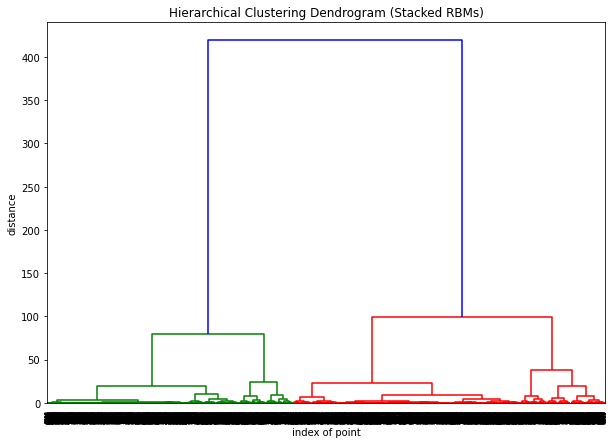

In [ ]:
X = stacked_rbms_data[0]
linked = linkage(X, 'ward')
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering for
# different options of linkage methods


plt.figure(figsize=(10, 7))

# plot dendrogram
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('index of point')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram (Stacked RBMs)')
plt.show()

# Cluster the data into 4 groups using hierachical agglomerative clustering and visualize

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
n_clusters = 4 # number of clusters 
hac_model = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward') # if the linkage is ward, affinity has to be euclidean
clustering = hac_model.fit(stacked_rbms_data[0] )

labels = clustering.labels_

## Visualize the clusters using PCA

In [ ]:
############## visualization ################
red = labels == 0
green = labels == 1
blue = labels == 2
yellow = labels ==3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(stacked_rbms_data[0]).transform(stacked_rbms_data[0])

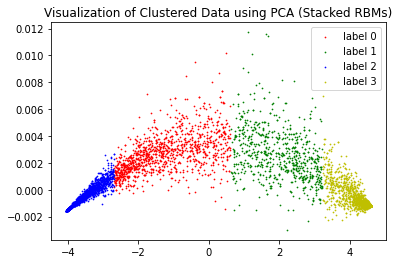

In [ ]:
plt.scatter(X_r[red, 0], X_r[red, 1], c="r",s=0.5,label='label 0')
plt.scatter(X_r[green, 0], X_r[green, 1], c="g",s=0.5,label = 'label 1')
plt.scatter(X_r[blue, 0], X_r[blue, 1], c="b",s=0.5,label = 'label 2')
plt.scatter(X_r[yellow, 0], X_r[yellow, 1], c="y",s=0.5,label = 'label 3')
plt.legend()
plt.title('Visualization of Clustered Data using PCA (Stacked RBMs)')
plt.show()

# Images Classification Analysis when number of clusters = 4

4


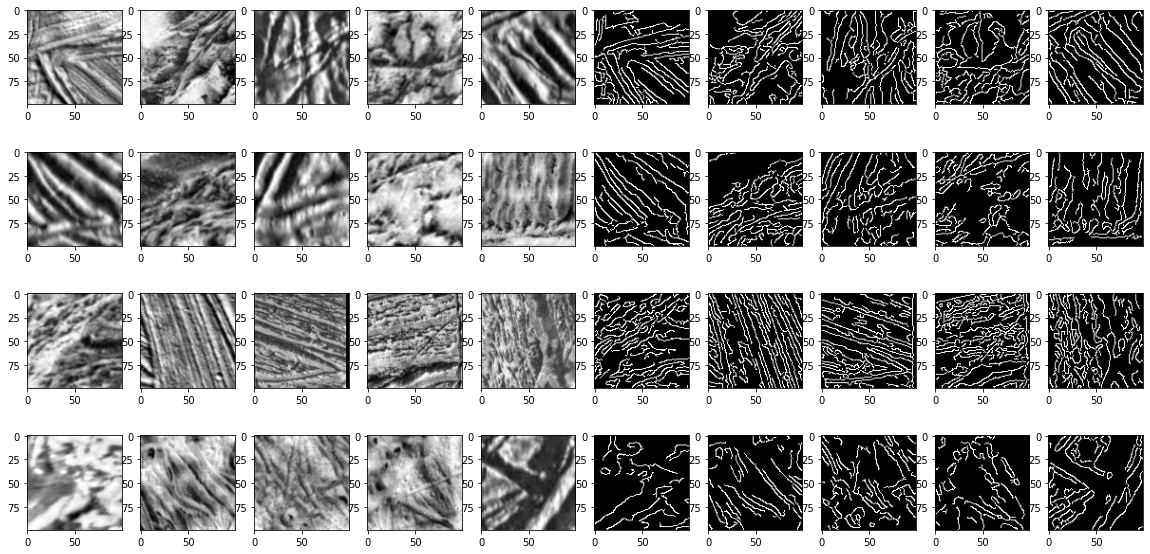

In [ ]:
"""
subplots those images with classification.
The row number correspond to the class number
The right hand side images are the edges detected from original images
"""

nb_image_type = len(np.unique(labels)) # count the number of image type after classification
print(nb_image_type)
nb_cols = 10 # number of columns in subplots

indexs = [] # indexes of images that we want to plot

for i in range(nb_image_type):
  indexs_temp = np.where(labels == i)[0]
  
  index_find = np.random.choice(indexs_temp, int(nb_cols/2.), replace=False) # select randomly a bunch of images from each type
  indexs.append(index_find)

fig, axarr = plt.subplots(nb_image_type,nb_cols,figsize=(20,10))
for idx in range(nb_image_type):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_original_images[0][index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_edges[0][index_img],cmap='gray')  # show the corresponding edges in the last 5 columns

# Cluster the data into 2 groups using hierachical agglomerative clustering and visualize

In [ ]:
n_clusters = 2 # number of clusters 
hac_model = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward') # if the linkage is ward, affinity has to be euclidean
clustering = hac_model.fit(stacked_rbms_data[0] )

labels = clustering.labels_

## Visualize the clusters using PCA

In [ ]:
############## visualization ################
red = labels == 0
green = labels == 1
blue = labels == 2
yellow = labels ==3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(stacked_rbms_data[0]).transform(stacked_rbms_data[0])

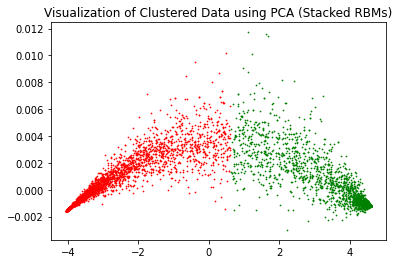

In [ ]:
plt.scatter(X_r[red, 0], X_r[red, 1], c="r",s=0.5,label='label 0')
plt.scatter(X_r[green, 0], X_r[green, 1], c="g",s=0.5,label = 'label 1')
plt.scatter(X_r[blue, 0], X_r[blue, 1], c="b",s=0.5,label = 'label 2')
plt.scatter(X_r[yellow, 0], X_r[yellow, 1], c="y",s=0.5,label = 'label 3')
#plt.legend()
plt.title('Visualization of Clustered Data using PCA (Stacked RBMs)')
plt.show()

## Plot the images and the corresponding edges that are clustered into the first group. Re-run the following cell if user wants to see more samples from this group

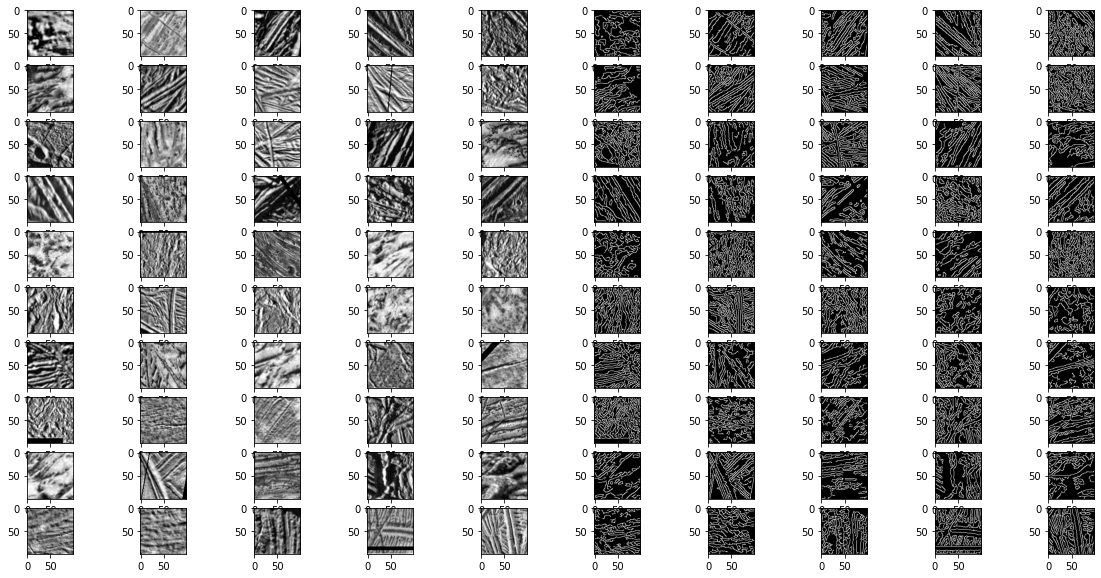

In [ ]:
# visualize the first group 

nb_rows = 10
nb_cols = 10 # number of columns in subplots


indexs_temp = np.where(labels == 0)[0]  # get all the indexes of images that are clustered into the first group
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_original_images[0][index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_edges[0][index_img],cmap='gray')  # show the corresponding edges in the last 5 columns

## Plot the images and the corresponding edges that are clustered into the second group. Re-run the following cell if user wants to see more samples from this group

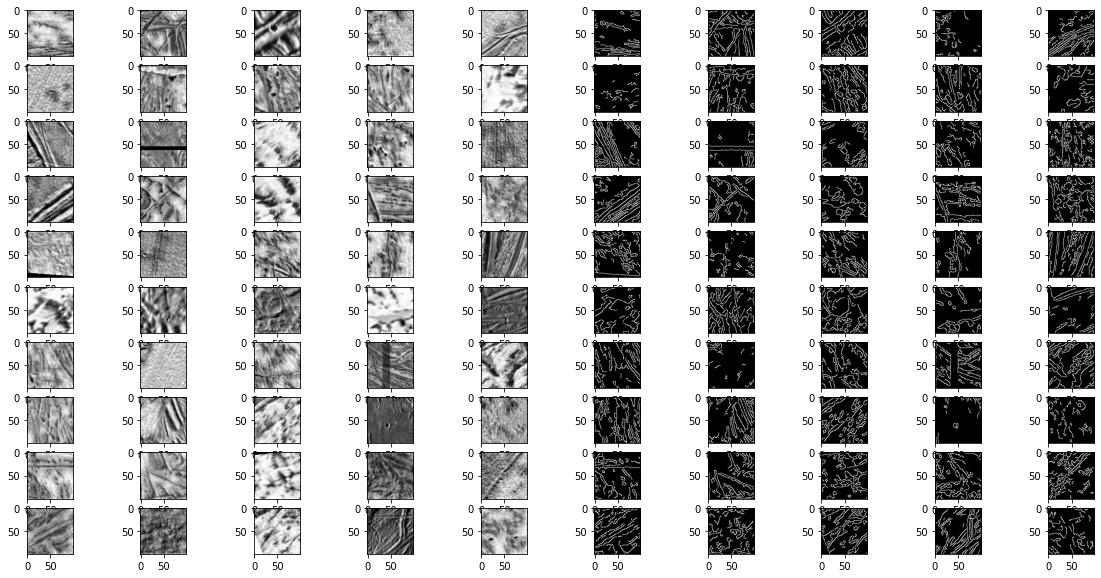

In [ ]:
# visualize the second group
nb_rows = 10
nb_cols = 10 # number of columns in subplots


indexs_temp = np.where(labels == 1)[0] # get all the indexes of images that are clustered into the second group
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_original_images[0][index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_edges[0][index_img],cmap='gray')  # show the corresponding edges in the last 5 columns

# We can cluster images into 2 group first, and then each large group can be divided to 2 smaller groups

In [ ]:
indexs_label_1 = np.where(labels==0)[0]
indexs_label_2 = np.where(labels==1)[0]
print(indexs_label_1.shape)  # get the number of images that are in the first large group
print(indexs_label_2.shape) # get the nubmer of images that are in the second large group

(4163,)
(3271,)


In [ ]:
stacked_rbms_all_images_label_1 = stacked_rbms_original_images[0][indexs_label_1]  # get the ndarray of the images that are clustered into first large group
stacked_rbms_all_images_label_2 = stacked_rbms_original_images[0][indexs_label_2]  # get the ndarray of the images that are clustered into second large group

stacked_rbms_all_edges_label_1 = stacked_rbms_edges[0][indexs_label_1] # get the ndarray of the corresponding edges of the images that are clustered into first large group
stacked_rbms_all_edges_label_2 = stacked_rbms_edges[0][indexs_label_2] # get the ndarray of the corresponding edges of the images that are clustered into second large group

stacked_rbms_all_encoded_data_label_1 = stacked_rbms_data[0][indexs_label_1] # get the ndarray of the corresponding encoded data of the images that are clustered into first large group
stacked_rbms_all_encoded_data_label_2 = stacked_rbms_data[0][indexs_label_2] # get the ndarray of the corresponding encoded data of the images that are clustered into second large group

# inspect the first large group

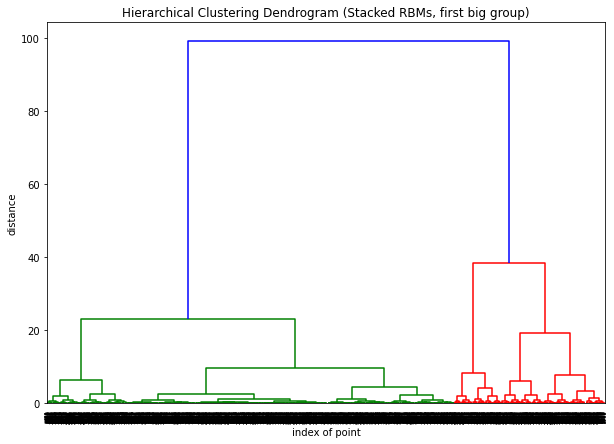

In [ ]:
X = stacked_rbms_all_encoded_data_label_1

linked = linkage(X, 'ward')
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering for
# different options of linkage methods


plt.figure(figsize=(10, 7))

# plot dendrogram
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('index of point')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram (Stacked RBMs, first big group)')
plt.show()

### Divide the first big group into two smaller group and visualize the clusters

In [ ]:
n_clusters = 2 # number of clusters 
hac_model = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward') # if the linkage is ward, affinity has to be euclidean
clustering = hac_model.fit(stacked_rbms_all_encoded_data_label_1)

labels_first = clustering.labels_

In [ ]:
############## visualization ################
red = labels_first == 0
green = labels_first == 1
blue = labels_first == 2
yellow = labels_first ==3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(stacked_rbms_all_encoded_data_label_1).transform(stacked_rbms_all_encoded_data_label_1)

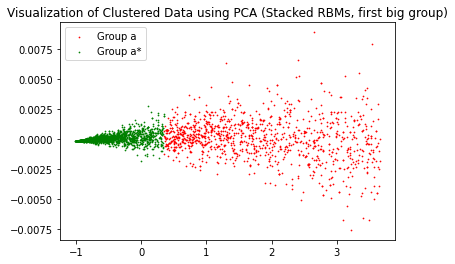

In [ ]:
plt.scatter(X_r[red, 0], X_r[red, 1], c="r",s=0.5,label='Group a')
plt.scatter(X_r[green, 0], X_r[green, 1], c="g",s=0.5,label = 'Group a*')
plt.legend()
plt.title('Visualization of Clustered Data using PCA (Stacked RBMs, first big group)')
plt.show()

## Plot the images and the corresponding edges that are clustered into the first smaller group. Re-run the following cell if user wants to see more samples from this group

1127


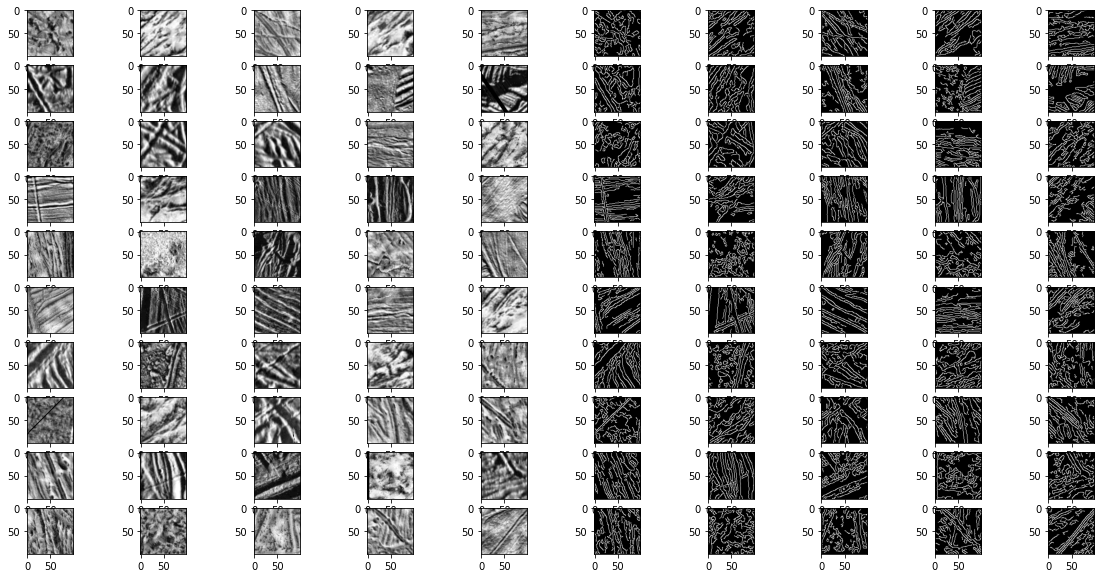

In [ ]:
# visualize the first smaller group 

nb_rows = 10
nb_cols = 10 # number of columns in subplots


indexs_temp = np.where(labels_first == 0)[0]
print(len(indexs_temp))
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images from each type
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_images_label_1[index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_edges_label_1[index_img],cmap='gray')  # show the corresponding edges in the last 5 columns

## Plot the images and the corresponding edges that are clustered into the second smaller group. Re-run the following cell if user wants to see more samples from this group

3036


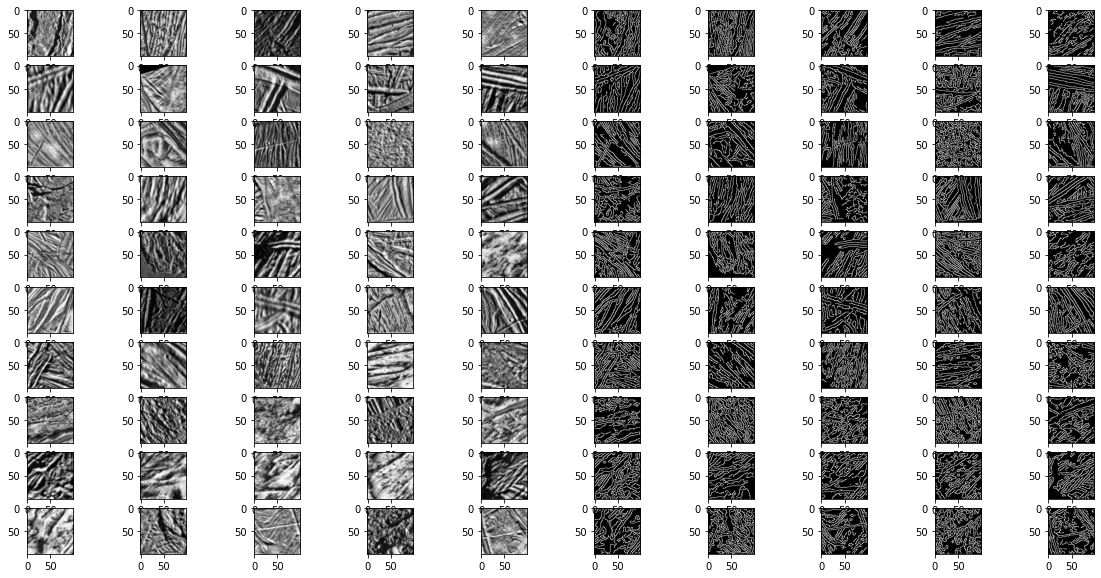

In [ ]:
# visualize the second smaller group

nb_rows = 10
nb_cols = 10 # number of columns in subplots


indexs_temp = np.where(labels_first == 1)[0]
print(len(indexs_temp))
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images from each type
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_images_label_1[index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_edges_label_1[index_img],cmap='gray')  # show the corresponding edges in the last 5 columns


# Inspect the second big group

(3271, 100)


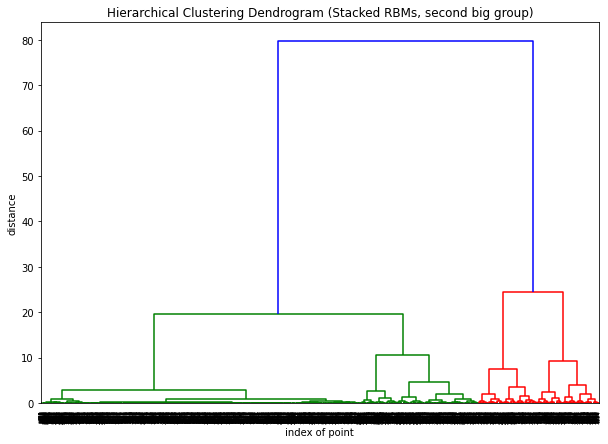

In [ ]:
X = stacked_rbms_all_encoded_data_label_2
print(X.shape)

linked = linkage(X, 'ward')
# see https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering for
# different options of linkage methods


plt.figure(figsize=(10, 7))

# plot dendrogram
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)

plt.xlabel('index of point')
plt.ylabel('distance')
plt.title('Hierarchical Clustering Dendrogram (Stacked RBMs, second big group)')
plt.show()

### Divide into two smaller groups

In [ ]:
n_clusters = 2 # number of clusters 
hac_model = AgglomerativeClustering(n_clusters,affinity='euclidean',linkage='ward') # if the linkage is ward, affinity has to be euclidean
clustering = hac_model.fit(stacked_rbms_all_encoded_data_label_2)

labels_second = clustering.labels_

In [ ]:
############## visualization ################
red = labels_second == 0
green = labels_second == 1
blue = labels_second == 2
yellow = labels_second ==3

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_r = pca.fit(stacked_rbms_all_encoded_data_label_2).transform(stacked_rbms_all_encoded_data_label_2)

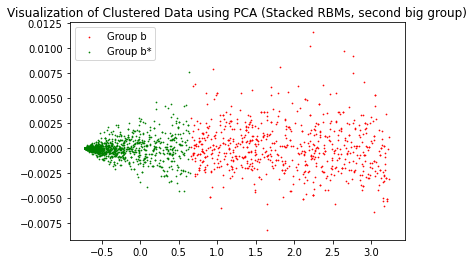

In [ ]:
plt.scatter(X_r[red, 0], X_r[red, 1], c="r",s=0.5,label='Group b')
plt.scatter(X_r[green, 0], X_r[green, 1], c="g",s=0.5,label = 'Group b*')
plt.legend()
plt.title('Visualization of Clustered Data using PCA (Stacked RBMs, second big group)')
plt.show()

## Plot the images and the corresponding edges that are clustered into the first smaller group. Re-run the following cell if user wants to see more samples from this group

704


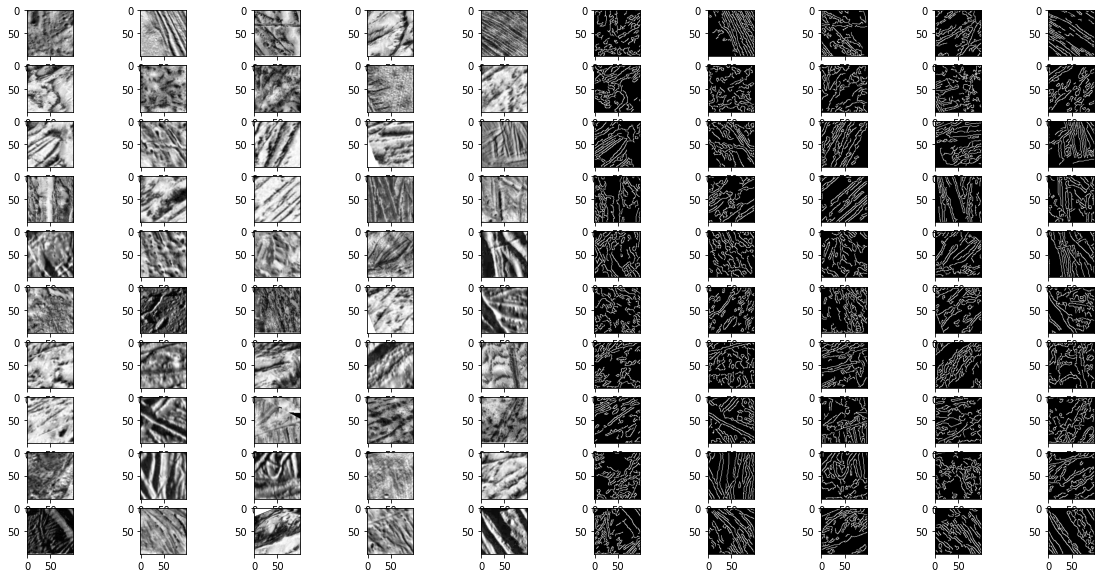

In [ ]:
# visualize the first smaller group 

nb_rows = 10
nb_cols = 10 # number of columns in subplots



indexs_temp = np.where(labels_second == 0)[0]
print(len(indexs_temp))
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images from each type
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_images_label_2[index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_edges_label_2[index_img],cmap='gray')  # show the corresponding edges in the last 5 columns

## Plot the images and the corresponding edges that are clustered into the second smaller group. Re-run the following cell if user wants to see more samples from this group

2567


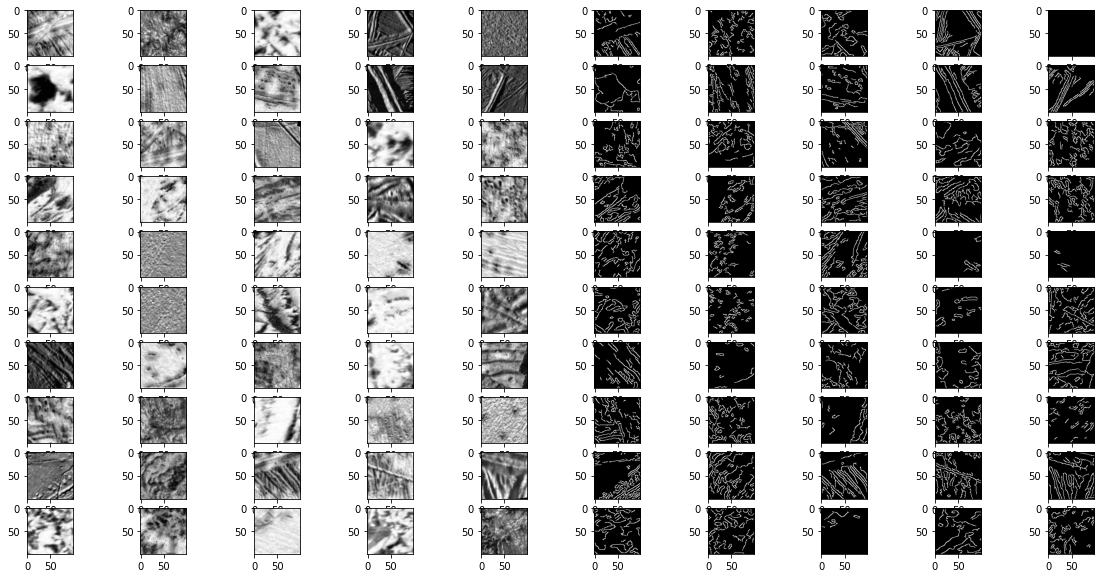

In [ ]:
# visualize the second smaller group

nb_rows = 10
nb_cols = 10 # number of columns in subplots

indexs_temp = np.where(labels_second == 1)[0]
print(len(indexs_temp))
index_find = np.random.choice(indexs_temp, int(nb_cols/2.)*nb_rows, replace=False) # select randomly a bunch of images from each type
indexs = index_find.reshape((nb_rows,-1))

fig, axarr = plt.subplots(nb_rows,nb_cols,figsize=(20,10))
for idx in range(nb_rows):
  for idy in range(nb_cols):
    if idy<5:
        index_img = indexs[idx][idy] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_images_label_2[index_img],cmap='gray')  # show original images in first 5 columns
    else:
        index_img = indexs[idx][idy-5] # the index of image we want to plot
        axarr[idx][idy].imshow(stacked_rbms_all_edges_label_2[index_img],cmap='gray')  # show the corresponding edges in the last 5 columns
